### Drilling Data Analysis and Visualization

In [1]:
import os
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from glob import glob
sns.set_theme()

#### Load Data

In [16]:
d = './data/'                                    # data directory
os.chdir(d)
files = glob('*')
os.chdir('../')
flist = [f[0:-4] for f in files]
[print(i, f) for i,f in enumerate(flist)]

0 ColumbusOH-OCT2020
1 demo
2 IndianapolisIN-OCT2020
3 SouthBendIN-OCT2020
4 ToledoOH-OCT2020


[None, None, None, None, None]

In [17]:
f = flist[0]
print(f)

ColumbusOH-OCT2020


In [3]:
p = './profiling/'                               # profiling directory
data = pd.read_csv(d+f+'.csv',quotechar='"')     # read with quotechar
data = data.iloc[::-1].reset_index()             # reverse order
data['TimeStamp'] = pd.to_datetime(data['TimeStamp']) # to datetime
n = len(data)                                    # add ROP
x = np.zeros(n)*np.nan
y = [True]*n
for i in range(1,n):
    x[i] = (data['TimeStamp'][i]-data['TimeStamp'][i-1]).total_seconds()
    y[i] = True if data['Rod Count'][i]>data['Rod Count'][i-1] else False
x[0] = np.mean(x[1:3]) # average of 2 and 3 for 1st time point only
data['ROP (ft/min)'] = np.array(y)*60.0*10.0/x
data['Drill'] = y
#data = data[data['Drill']]                       # Remove all but forward drill
#data = data[data['ROP (ft/min)']<4]              # Keep data with ROP < 4
data['Time'] = data['TimeStamp']                 # Time last
del data['TimeStamp']                            # remove TimeStamp
del data['index']                                # remove index
data.head(10)

c:\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
c:\python36\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


Rod Count  Rotation Speed Max (rpm)  Rotation Torque Max (ft-lb)  \
0          1                       175                         2466   
1          2                       159                         4067   
2          3                       157                         3312   
3          4                       159                         3312   
4          5                       166                         2661   
5          6                       159                         2298   
6          7                       167                         2298   
7          8                       169                         3700   
8          7                       169                         3700   
9          8                       184                         3000   

   Thrust Force Max (lbf)  Mud Flow Rate Avg (gpm)  Mud Pressure Max (psi)  \
0                   16330                      0.0                       0   
1                   19520                      0.0                       0   
2                   22060                      0.0                       0   
3                   22060                      0.0                       0   
4                   11660                      0.0                       0   
5                   20120                      0.0                       0   
6                   20120                      0.0                       0   
7                   22840                      0.0                       0   
8                   22840                      0.0                       0   
9                   18440                      0.0                       0   

   Thrust Speed Avg (ft/min)  Pull Force Maximum (lbf)  \
0                       21.8                      5310   
1                        3.7                     11860   
2                       10.0                         0   
3                       16.3                      6600   
4                       21.9                         0   
5                       17.4                         0   
6                       20.5                         0   
7                       11.3                     17790   
8                       11.8                     17790   
9                       14.4                         0   

   Pull Speed Average (ft/min)  Drill String Length (ft)  ROP (ft/min)  Drill  \
0                         26.7                        24      1.538462   True   
1                         19.6                        34      0.833333   True   
2                          0.0                        44     10.000000   True   
3                         30.2                        54     10.000000   True   
4                          0.0                        64     10.000000   True   
5                          0.0                        74     10.000000   True   
6                          0.0                        84     10.000000   True   
7                         39.4                        74      5.000000   True   
8                         48.5                        84      0.000000  False   
9                          0.0                        94      5.000000   True   

                 Time  
0 2020-10-01 07:23:00  
1 2020-10-01 07:35:00  
2 2020-10-01 07:36:00  
3 2020-10-01 07:37:00  
4 2020-10-01 07:38:00  
5 2020-10-01 07:39:00  
6 2020-10-01 07:40:00  
7 2020-10-01 07:42:00  
8 2020-10-01 07:43:00  
9 2020-10-01 07:45:00

### Summary Statistics and Profiling

In [4]:
data.describe()

Rod Count  Rotation Speed Max (rpm)  Rotation Torque Max (ft-lb)  \
count  2449.000000               2449.000000                  2449.000000   
mean     16.465496                218.949775                  2484.946100   
std      10.938579                 47.989654                  1270.391876   
min       1.000000                  0.000000                     0.000000   
25%       7.000000                179.000000                  1522.000000   
50%      15.000000                230.000000                  2254.000000   
75%      24.000000                243.000000                  3237.000000   
max      49.000000                313.000000                  5312.000000   

       Thrust Force Max (lbf)  Mud Flow Rate Avg (gpm)  \
count             2449.000000              2449.000000   
mean             10065.022458                 5.942548   
std              10467.299778                 7.469350   
min                  0.000000                 0.000000   
25%                  0.000000                 0.000000   
50%               8230.000000                 1.600000   
75%              17860.000000                12.000000   
max              30950.000000                45.900000   

       Mud Pressure Max (psi)  Thrust Speed Avg (ft/min)  \
count             2449.000000                2449.000000   
mean               223.393630                  17.643977   
std                412.930173                  25.218459   
min                  0.000000                   0.000000   
25%                  0.000000                   0.000000   
50%                 53.000000                   8.400000   
75%                175.000000                  27.000000   
max               1720.000000                 141.900000   

       Pull Force Maximum (lbf)  Pull Speed Average (ft/min)  \
count               2449.000000                   2449.00000   
mean                8120.347080                     20.94463   
std                 7875.312921                     22.45374   
min                    0.000000                      0.00000   
25%                    0.000000                      0.00000   
50%                 6720.000000                     14.30000   
75%                12860.000000                     35.50000   
max                31620.000000                     93.40000   

       Drill String Length (ft)  ROP (ft/min)  
count               2449.000000   2177.000000  
mean                 168.481829           inf  
std                  109.654805           NaN  
min                    0.000000      0.000000  
25%                   74.000000      0.000000  
50%                  154.000000      3.333333  
75%                  244.000000     10.000000  
max                  494.000000           inf

In [5]:
col=data.columns
print(col)

Index(['Rod Count', 'Rotation Speed Max (rpm)', 'Rotation Torque Max (ft-lb)',
       'Thrust Force Max (lbf)', 'Mud Flow Rate Avg (gpm)',
       'Mud Pressure Max (psi)', 'Thrust Speed Avg (ft/min)',
       'Pull Force Maximum (lbf)', 'Pull Speed Average (ft/min)',
       'Drill String Length (ft)', 'ROP (ft/min)', 'Drill', 'Time'],
      dtype='object')


In [6]:
file = p+f+'.html'
if not os.path.isfile(file):
    prof = ProfileReport(data)
    prof.to_file(output_file=file)
else:
    print('Delete file '+file+' to regenerate profiling report')

Delete file ./profiling/ColumbusOH-OCT2020.html to regenerate profiling report


### Visualization

#### Sequential Plot

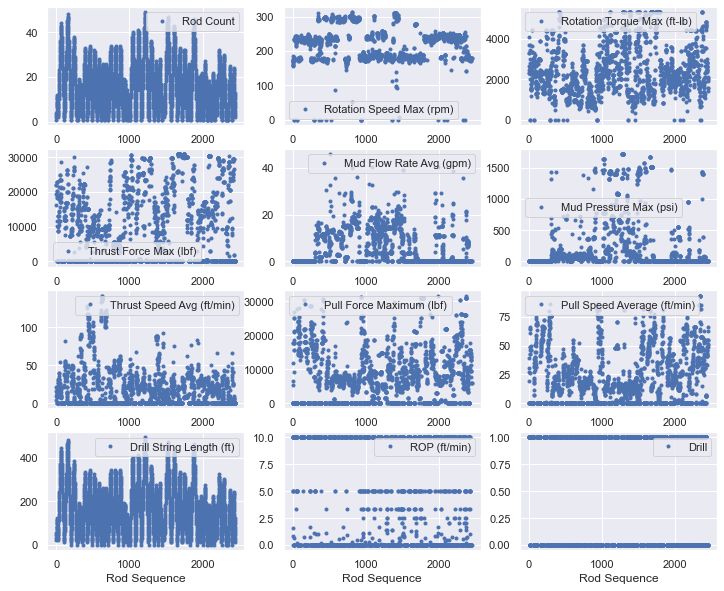

In [7]:
plt.figure(figsize=(12,10))
n = len(col)-1
nc = 3
nr = int(np.ceil(n/nc))
for i,c in enumerate(col[0:-1]):
    ax = plt.subplot(nr,nc,i+1)
    plt.plot(data[c],'b.',label=c)
    plt.xlabel('Rod Sequence')
    plt.legend()
plt.show()

#### Effect of Rod Length

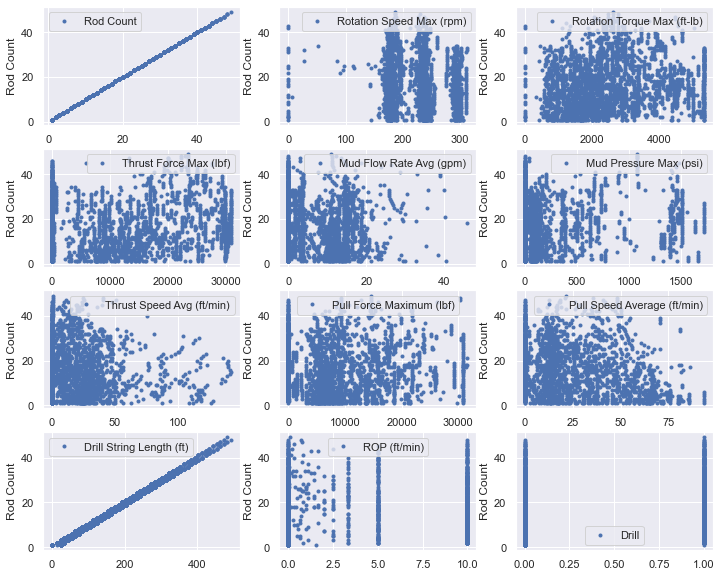

In [8]:
plt.figure(figsize=(12,10))
n = len(col)-1
nc = 3
nr = int(np.ceil(n/nc))
for i,c in enumerate(col[0:-1]):
    ax = plt.subplot(nr,nc,i+1)
    plt.plot(data[c],data['Rod Count'],'b.',label=c)
    plt.ylabel('Rod Count')
    plt.legend()
plt.show()

#### ROP Effect

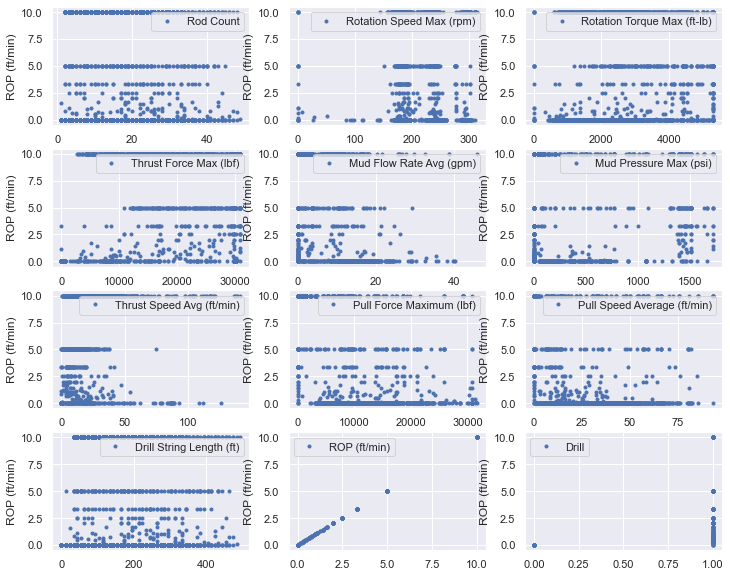

In [9]:
plt.figure(figsize=(12,10))
n = len(col)-1
nc = 3
nr = int(np.ceil(n/nc))
for i,c in enumerate(col[0:-1]):
    ax = plt.subplot(nr,nc,i+1)
    plt.plot(data[c],data['ROP (ft/min)'],'b.',label=c)
    plt.ylabel('ROP (ft/min)')
    plt.legend()
plt.savefig('./figures/ROP_'+f+'.png')